In [1]:
# 1
import numpy as np
import random
import torch
import matplotlib.pyplot as plt
from torch import nn
from torch.utils import data
from torchvision import transforms
import torchvision

In [2]:
from d2l import torch as d2l
from IPython import display

In [3]:
# 2
a = np.arange(4, 7)
print(type(a), a.shape, a[0])

<class 'numpy.ndarray'> (3,) 4


In [4]:
# 3
b= np.array([[4, 5, 6], [1, 2, 3]])
print("第一维:"+str(b.shape[0]))
print("第二维:"+str(b.shape[1]))
print(b[0, 0], b[0, 1], b[1, 1])

第一维:2
第二维:3
4 5 2


In [5]:
#  4
c = np.mat('0 0 0; 0 0 0; 0 0 0')
d = np.mat(np.ones_like(np.arange(20).reshape(4, 5)))
e = np.mat(np.eye(4))
c, d, e

(matrix([[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]),
 matrix([[1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1]]),
 matrix([[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]]))

In [6]:
# 5
f = np.arange(12)
print(f, f.shape)
f = f.reshape(3, 4)
print(f, f.shape)
print(f[1, :])
print(f[:, 2:])
f[2, -1]

[ 0  1  2  3  4  5  6  7  8  9 10 11] (12,)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] (3, 4)
[4 5 6 7]
[[ 2  3]
 [ 6  7]
 [10 11]]


11

((100,), (100,))

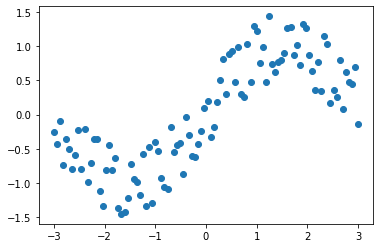

In [7]:
# 1
num_observations = 100
x = np.linspace(-3, 3, num_observations)
y = np.sin(x) + np.random.uniform(-0.5, 0.5, num_observations)
plt.scatter(x, y)
x.shape, y.shape

In [8]:
# 线性回归模型
# 与x, y 共享内存
tx = torch.from_numpy(x).reshape(-1, 1).type(torch.float32)
ty = torch.from_numpy(y).reshape(-1, 1).type(torch.float32)

def load_array(data_arrays, batch_size, is_train=True):
    '''构造一个PyTorch的数据迭代器'''
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
batch_size = 10

net = nn.Sequential(nn.Linear(1, 1))

# 初始化模型参数
w = net[0].weight.data.normal_(0, 0.01)
b = net[0].bias.data.fill_(0)

# 均方误差
loss = nn.MSELoss()

# SGD
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

num_epochs = 5

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, tx, ty):
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(X), y)
    print(f'epoch {epoch + 1}, loss {l:f}')

print(w, b)
print(w * tx[0] + b, ty[0])

epoch 1, loss 0.192396
epoch 2, loss 0.303177
epoch 3, loss 0.321296
epoch 4, loss 0.193152
epoch 5, loss 0.373613
tensor([[0.3775]]) tensor([0.0017])
tensor([[-1.1309]]) tensor([-0.2621])


In [9]:
print(loss(net(tx), ty))

tensor(0.2678, grad_fn=<MseLossBackward>)


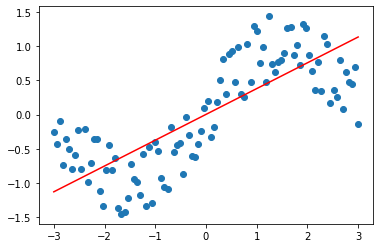

In [10]:
plt.plot(tx.detach().numpy(), net(tx).detach().numpy(), color='r')
plt.scatter(tx.detach().numpy(), ty)

((100,), (100,))

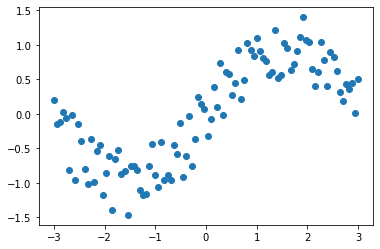

In [11]:
# 2
num_observations = 100
x = np.linspace(-3, 3, num_observations)
y = np.sin(x) + np.random.uniform(-0.5, 0.5, num_observations)
plt.scatter(x, y)
x.shape, y.shape

In [12]:
max_degree = 3

p_x = x.reshape(100, 1)
tx = np.power(p_x, np.arange(1, max_degree+1).reshape(1, -1))

In [13]:
tx, ty = [torch.tensor(x).type(torch.float32) for x in [tx, y]]

In [14]:
tx.shape, ty.shape

(torch.Size([100, 3]), torch.Size([100]))

In [15]:
# 网络结构
net = nn.Sequential(nn.Linear(3, 1))
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

def train(train_features, train_labels, num_epochs=3):
    # 损失函数
    loss = nn.MSELoss()
    
    # 批量
    batch_size = 10
    
    train_iter = load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)

    trainer = torch.optim.SGD(net.parameters(), lr=0.01)

    for epoch in range(num_epochs):
            for X, y in data_iter(batch_size, tx, ty):
                l = loss(net(X), y)
                trainer.zero_grad()
                l.backward()
                trainer.step()
            l = loss(net(X), y)
            print(f'epoch {epoch + 1}, loss {l:f}')
    print('weight:', net[0].weight.data.numpy())

In [16]:
train(tx, ty)

epoch 1, loss 0.656446
epoch 2, loss 10.495405
epoch 3, loss 0.444250
weight: [[-0.04884129  0.06168874 -0.03634646]]


F:\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


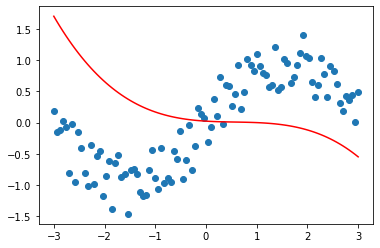

In [17]:
plt.plot(x, net(tx).detach().numpy(), color='r')
plt.scatter(x, y)

In [18]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.MNIST(
    root="D:\gyb-大三课\data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.MNIST(
    root="D:\gyb-大三课\data", train=False, transform=trans, download=True)

F:\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [19]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [20]:
batch_size = 256

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=4)
test_iter = data.DataLoader(mnist_test, batch_size, shuffle=True,
                             num_workers=4)

In [21]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [22]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制

In [23]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

In [24]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

In [25]:
class Accumulator:  
    """在`n`个变量上累加。"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [26]:
def accuracy(y_hat, y): 
    """计算预测正确的数量。"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [27]:
def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度。"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    for X, y in data_iter:
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [28]:
evaluate_accuracy(net, test_iter)

0.1319

In [29]:
class Animator:  
    """在动画中绘制数据。"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [30]:
def train_epoch_ch3(net, train_iter, loss, updater):  
    """训练模型一个迭代周期（定义见第3章）。"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l) * len(y), accuracy(y_hat, y),
                       y.size().numel())
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练准确率
    return metric[0] / metric[2], metric[1] / metric[2]

In [31]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [32]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

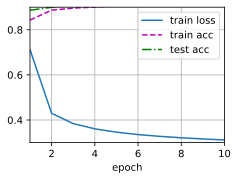

In [33]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)